<a href="https://colab.research.google.com/github/Rullyro/AIDepartmen1/blob/main/AI1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [3]:
# load dataset
col_names = ['pH', 'EC mS/cm', 'N_NO3 ppm', 'P ppm', 'K ppm', 'Class']
feature_cols = ['pH', 'EC mS/cm', 'N_NO3 ppm', 'P ppm', 'K ppm']
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/soildatanew.csv")
df

Mounted at /content/drive


,ID,pH,EC mS/cm,N_NO3 ppm,P ppm,K ppm,Class
0,1,5.16,0.274,14.46,18.61,147,Tidak Optimal
1,2,6.07,0.355,14.59,32.74,180,Optimal
2,3,6.92,0.675,14.91,19.02,183,Optimal
3,4,7.70,0.355,4.21,6.28,116,Tidak Optimal
4,5,7.61,0.392,6.11,6.55,228,Tidak Optimal
...,...,...,...,...,...,...,...
776,777,6.72,0.454,7.66,20.67,395,Optimal
777,778,7.79,0.343,5.20,4.14,286,Tidak Optimal
778,779,7.63,1.135,17.13,6.90,582,Tidak Optimal
779,780,7.73,0.393,3.92,7.93,335,Tidak Optimal


In [4]:
# Konversi EC
df['EC mS/cm']=df['EC mS/cm']*1000
df['EC mS/cm'].describe()

count     781.000000
mean      452.792574
std       304.840569
min       134.000000
25%       338.000000
50%       404.000000
75%       497.000000
max      5621.000000
Name: EC mS/cm, dtype: float64

In [5]:
df = df.drop(['ID'], axis=1)

In [ ]:
df

In [6]:
X = df.iloc[:,0:5] # Features
Y = pd.DataFrame(df['Class']) # Target variable

In [ ]:
X

In [7]:
# Normalisasi
sc = MinMaxScaler(feature_range=(0, 1))
X_Normalize = pd.DataFrame(data=sc.fit_transform(X),columns=feature_cols)

In [8]:
# Gabung data yg telah di normalisasi dg classnya
data1 = pd.merge(X_Normalize, Y, left_index=True, right_index=True)

In [ ]:
data1

In [9]:
#Split data optimal dan Tidak Optimal
data_optimal = data1[data1['Class'] == 'Optimal']
data_tidak_optimal = data1[data1['Class'] == 'Tidak Optimal']

In [ ]:
data_tidak_optimal

In [10]:
df1 = pd.concat([data_optimal, data_tidak_optimal])
x1 = df1.drop(labels=['Class'], axis=1) #variabel fitur
y1= df1['Class'] #variabel kelas

In [ ]:
x1

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.25, random_state=0, stratify=y1)

In [ ]:
y_test

Accuracy: 1.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


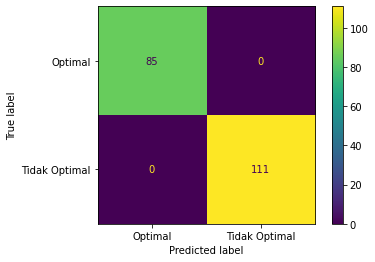

In [13]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth = None, min_samples_split = 2)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

matrix = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(clf, X_test, y_test)  
plt.show()  


Akurasi dengan menggunakan Decision Tree:  1.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


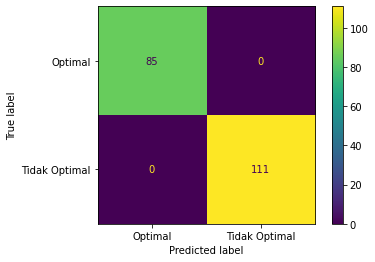

               precision    recall  f1-score   support

      Optimal       1.00      1.00      1.00        85
Tidak Optimal       1.00      1.00      1.00       111

     accuracy                           1.00       196
    macro avg       1.00      1.00      1.00       196
 weighted avg       1.00      1.00      1.00       196



In [14]:
# Decision Tree dengan maximal kedalaman adalah 1 dan minimal jumlah sampel untuk dibentuk leaf baru adalah 2
dt = DecisionTreeClassifier(
  max_depth = 3,
  min_samples_split = 2
) #random_state=0, max_depth=2.  (*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, ccp_alpha=0.0)

dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
print("Akurasi dengan menggunakan Decision Tree: ", score)

# Confusion matrix
matrix = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(dt, X_test, y_test)  
plt.show()  

# Classification report
report = classification_report(y_test, y_pred)
# cek hasil matrix
print(report)

In [ ]:
df.info()

In [ ]:
df['Class']

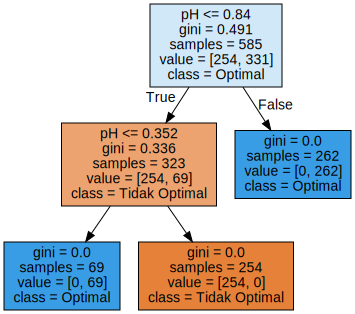

In [15]:
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=['pH', 'EC mS/cm', 'N_NO3 ppm', 'P ppm', 'K ppm'],  
                      class_names=df['Class'],  
                      filled=True)  
graph = graphviz.Source(dot_data)  
graph 


KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_train)
report = classification_report(y_train, y_pred)

print(report)
knn.score(X_test, y_test)



ANN

In [20]:
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

Learning ANN

Akurasi dengan menggunakan Nearest Neighbor:  0.9897959183673469


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


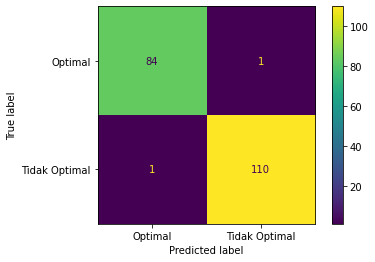

               precision    recall  f1-score   support

      Optimal       0.99      0.99      0.99        85
Tidak Optimal       0.99      0.99      0.99       111

     accuracy                           0.99       196
    macro avg       0.99      0.99      0.99       196
 weighted avg       0.99      0.99      0.99       196



In [21]:

mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(3, 3), random_state=1)

mlp.fit(X_train,y_train)
y_pred = mlp.predict(X_test)

#akurasi
score = metrics.accuracy_score(y_test, y_pred)
print("Akurasi dengan menggunakan Nearest Neighbor: ", score)

# Confusion matrix
matrix = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(mlp, X_test, y_test)  
plt.show()  

# Classification report
report = classification_report(y_test, y_pred)
# cek hasil matrix
print(report)


In [24]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
df1['Class'] = labelencoder.fit_transform(df1['Class'])

In [41]:
X = df1.iloc[:,0:5]
y = df1['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

In [42]:
X

,pH,EC mS/cm,N_NO3 ppm,P ppm,K ppm
1,0.425876,0.040277,0.119625,0.209250,0.091187
2,0.654987,0.098597,0.122281,0.118599,0.093023
5,0.541779,0.039184,0.048481,0.087479,0.122399
6,0.533693,0.153271,0.293707,0.088404,0.093023
8,0.423181,0.024057,0.027644,0.059134,0.109547
...,...,...,...,...,...
775,0.870620,0.053946,0.034368,0.027354,0.257650
777,0.889488,0.038090,0.041674,0.020284,0.156059
778,0.846361,0.182431,0.140711,0.038520,0.337209
779,0.873315,0.047202,0.031048,0.045325,0.186047


ANN KERAS

In [43]:
from keras.models import Sequential
from keras.layers import Flatten, Dense
from tensorflow.keras.utils import to_categorical
import numpy as np

train_labels = to_categorical(y_train)
test_labels = to_categorical(y_test)

model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(5,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['acc'])

history = model.fit(X_train, train_labels,epochs=64,batch_size=5)
model.summary()


Epoch 1/64
125/125 [==============================] - 1s 3ms/step - loss: 0.6769 - acc: 0.5577
Epoch 2/64
125/125 [==============================] - 0s 2ms/step - loss: 0.6157 - acc: 0.6747
Epoch 3/64
125/125 [==============================] - 0s 2ms/step - loss: 0.4972 - acc: 0.7788
Epoch 4/64
125/125 [==============================] - 0s 3ms/step - loss: 0.3874 - acc: 0.8269
Epoch 5/64
125/125 [==============================] - 0s 2ms/step - loss: 0.3359 - acc: 0.8494
Epoch 6/64
125/125 [==============================] - 0s 3ms/step - loss: 0.2922 - acc: 0.8590
Epoch 7/64
125/125 [==============================] - 0s 3ms/step - loss: 0.2507 - acc: 0.9022
Epoch 8/64
125/125 [==============================] - 0s 2ms/step - loss: 0.2489 - acc: 0.8814
Epoch 9/64
125/125 [==============================] - 0s 2ms/step - loss: 0.1929 - acc: 0.9279
Epoch 10/64
125/125 [==============================] - 0s 3ms/step - loss: 0.1880 - acc: 0.9247
Epoch 11/64
125/125 [============================

In [ ]:
!pip install ann_visualizer

In [30]:
from ann_visualizer.visualize import ann_viz;

ann_viz(model, title="visualisasi Keras Model")

In [59]:
df1

,pH,EC mS/cm,N_NO3 ppm,P ppm,K ppm,Class
1,0.425876,0.040277,0.119625,0.209250,0.091187,0
2,0.654987,0.098597,0.122281,0.118599,0.093023,0
5,0.541779,0.039184,0.048481,0.087479,0.122399,0
6,0.533693,0.153271,0.293707,0.088404,0.093023,0
8,0.423181,0.024057,0.027644,0.059134,0.109547,0
...,...,...,...,...,...,...
775,0.870620,0.053946,0.034368,0.027354,0.257650,1
777,0.889488,0.038090,0.041674,0.020284,0.156059,1
778,0.846361,0.182431,0.140711,0.038520,0.337209,1
779,0.873315,0.047202,0.031048,0.045325,0.186047,1


In [ ]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [ ]:
x = df.iloc[:, 0]
y = df['Class']
plt.scatter(x, y, s=50, alpha=0.7)
plt.xlabel('pH')
plt.ylabel('Class')

In [61]:
value = [0.423181,	0.024057,	0.027644,	0.059134,	0.109547]
pred = model.predict([value])
pred

1/1 [==============================] - 0s 59ms/step


array([[9.9987984e-01, 1.2012456e-04]], dtype=float32)

In [90]:
value = [6.92, 675, 14.91, 19.02, 183]
pred = clf.predict(sc.transform([value]))
print(pred)

['Optimal']


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [63]:
value = [0.42587601078167125, 0.04027701840714416, 0.11962477170845094, 0.20925008259002315, 0.09118727050183598]
pred = model.predict([value])
pred

1/1 [==============================] - 0s 51ms/step


array([[9.9995196e-01, 4.7993130e-05]], dtype=float32)

In [82]:
import numpy as np
value = [6.5, 0.349, 6.02, 14.31, 231]
sc.transform([value])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


array([[ 0.54177898, -0.02435775,  0.04848082,  0.08747935,  0.12239902]])

In [87]:
sc.transform([value])
pred = clf.predict(sc.transform([value]))
print("X=%s, Predicted=%s" % ([value], pred))

X=[[6.5, 0.349, 6.02, 14.31, 231]], Predicted=['Optimal']


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
